Analisis, preprocesados, entrenamiento y presentacion de resultados

In [1]:
# cargamos las librerias necesarias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import os

In [2]:
# cargamos las librerias de preprocesado
from sklearn.impute import SimpleImputer

In [3]:
current_directory = os.getcwd()

In [4]:
# importamos el datset
dataset=pd.read_csv('data.csv', encoding='ISO-8859-1')

In [5]:
# vemos las primeras 7 filas del dataset
dataset.head(7)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,12/1/2010 8:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,12/1/2010 8:26,4.25,17850.0,United Kingdom


In [6]:
# obtenemos la cantidad de filas y columnas
dataset.shape

(541909, 8)

In [7]:
# obtenemos el nombre de las columnas
dataset.columns

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')

In [8]:
# obtenemos el tipo de cada columna
dataset.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [9]:
# verificamos si tenemos valores faltantes y valors nulos

def valores_faltantes(datasetInput, pd):
    resultados = {}
    array_nombre_columnas = datasetInput.columns
    for item in array_nombre_columnas:
        resultados[item]=pd.isna(dataset[item]).values.ravel().sum()
    return resultados


def valores_null(datasetInput, pd):
    resultados = {}
    array_nombre_columnas = datasetInput.columns
    for item in array_nombre_columnas:
        resultados[item]=pd.isnull(dataset[item]).values.ravel().sum()
    return resultados

In [10]:
# obtenemos los valores faltantes
valores_faltantes(dataset, pd)

{'InvoiceNo': 0,
 'StockCode': 0,
 'Description': 1454,
 'Quantity': 0,
 'InvoiceDate': 0,
 'UnitPrice': 0,
 'CustomerID': 135080,
 'Country': 0}

In [11]:
# obtenemos los valores nulos
valores_null(dataset, pd)

{'InvoiceNo': 0,
 'StockCode': 0,
 'Description': 1454,
 'Quantity': 0,
 'InvoiceDate': 0,
 'UnitPrice': 0,
 'CustomerID': 135080,
 'Country': 0}

Remove espacios en blanco al inicio y al final de las columnas Description, Country

In [12]:
dataset['Description'] = dataset['Description'].str.strip()
dataset['Country'] = dataset['Country'].str.strip()

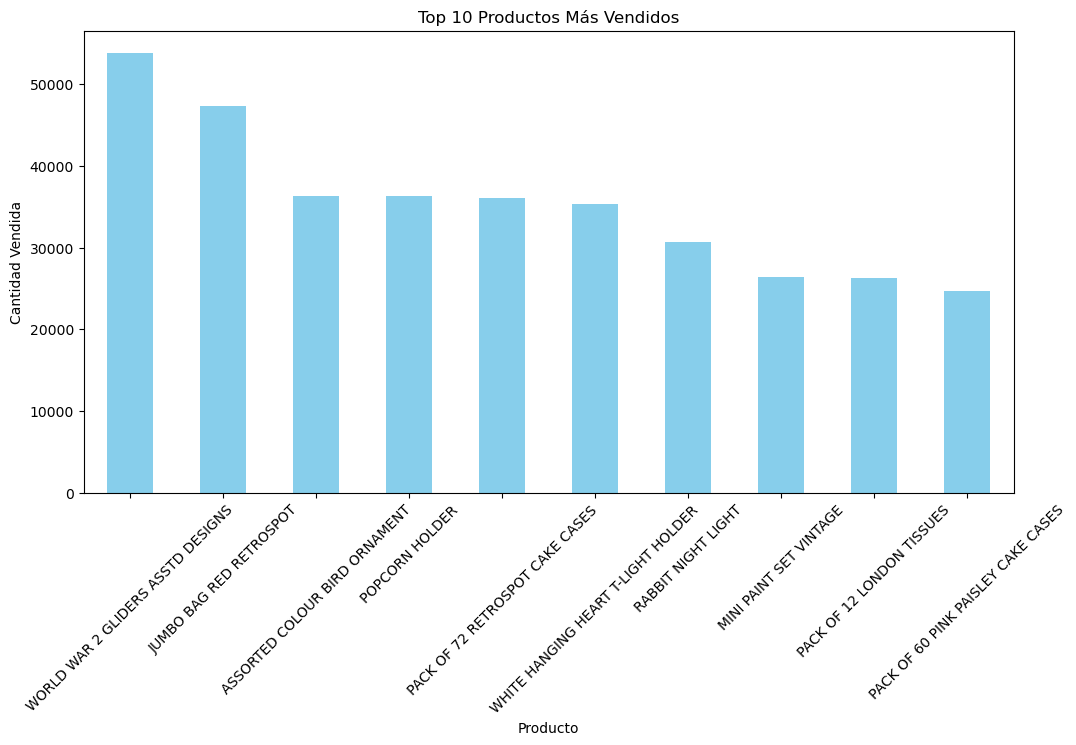

In [13]:
# Distribucion de ventas por producto

# Agrupar por descripción y sumar las cantidades vendidas
ventas_por_producto = dataset.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
ventas_por_producto.head(10).plot(kind='bar', color='skyblue')
plt.title('Top 10 Productos Más Vendidos')
plt.xlabel('Producto')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.show()

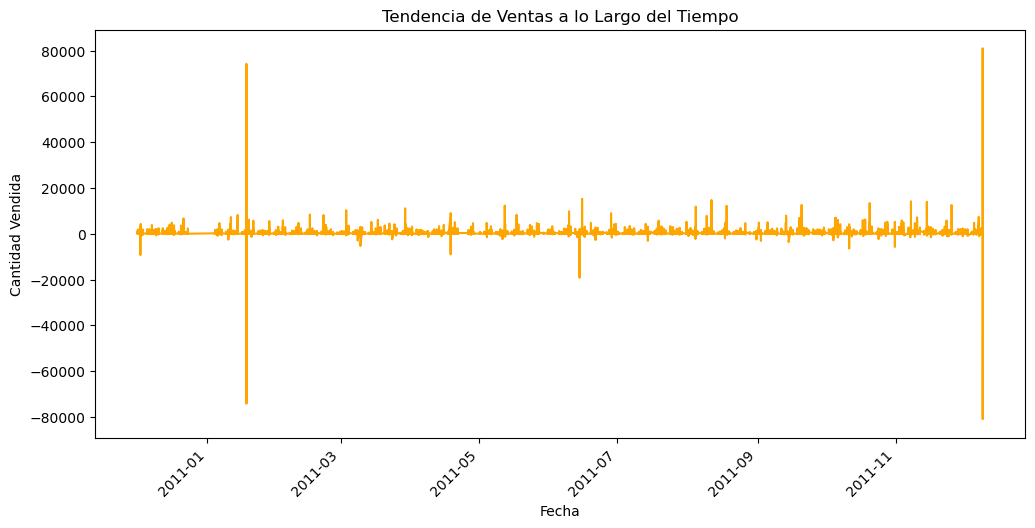

In [14]:
# Agrupar por fecha y sumar las cantidades vendidas

data2 = dataset.copy()
# Convertir InvoiceDate a datetime
data2['InvoiceDate'] = pd.to_datetime(data2['InvoiceDate'])


ventas_por_fecha = data2.groupby(data2['InvoiceDate'])['Quantity'].sum()

# Crear gráfico de líneas
plt.figure(figsize=(12, 6))
ventas_por_fecha.plot(kind='line', color='orange')
plt.title('Tendencia de Ventas a lo Largo del Tiempo')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.show()

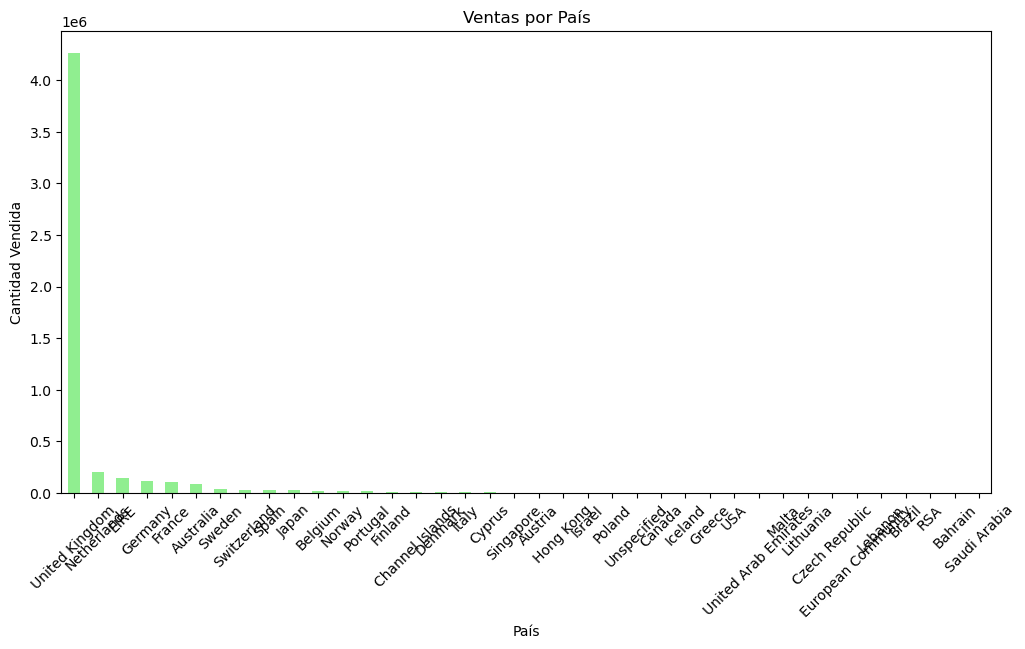

In [15]:
# Agrupar por país y sumar las cantidades vendidas
ventas_por_pais = dataset.groupby('Country')['Quantity'].sum().sort_values(ascending=False)

# Crear gráfico de barras
plt.figure(figsize=(12, 6))
ventas_por_pais.plot(kind='bar', color='lightgreen')
plt.title('Ventas por País')
plt.xlabel('País')
plt.ylabel('Cantidad Vendida')
plt.xticks(rotation=45)
plt.show()

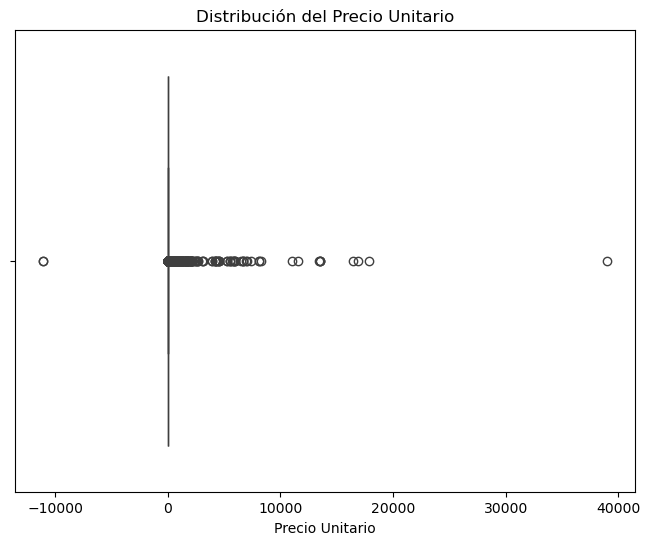

In [16]:
# Análisis del Precio Unitario

# Crear boxplot del precio unitario
plt.figure(figsize=(8, 6))
sns.boxplot(x=dataset['UnitPrice'])
plt.title('Distribución del Precio Unitario')
plt.xlabel('Precio Unitario')
plt.show()

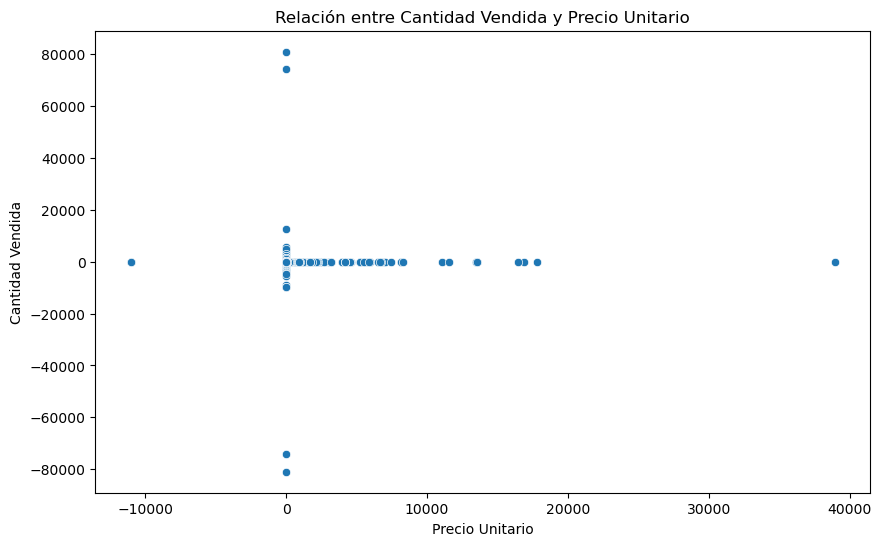

In [17]:
#5. Relación entre Cantidad Vendida y Precio Unitario
#Un gráfico de dispersión puede mostrarte si hay alguna relación entre la cantidad vendida y el precio unitario.

# Crear gráfico de dispersión
plt.figure(figsize=(10, 6))
sns.scatterplot(x='UnitPrice', y='Quantity', data=dataset)
plt.title('Relación entre Cantidad Vendida y Precio Unitario')
plt.xlabel('Precio Unitario')
plt.ylabel('Cantidad Vendida')
plt.show()

In [24]:
#Gráfica de Demanda de Productos por Mes
#Preparación de Datos
#Primero, necesitas agrupar los datos por mes y producto para calcular la cantidad total vendida cada mes.
data2 = dataset.copy()
# Convertir InvoiceDate a datetime
data2['InvoiceDate'] = pd.to_datetime(data2['InvoiceDate'])

# Agrupar por mes y producto
data2['Month'] = data2['InvoiceDate'].dt.to_period('M')
demanda_por_mes = data2.groupby(['Month', 'Description'])['Quantity'].sum().unstack(fill_value=0)

# Crear gráfico de líneas
plt.figure(figsize=(7, 5))
demanda_por_mes.plot(kind='line', marker='o')
plt.title('Demanda de Productos por Mes')
plt.xlabel('Mes')
plt.ylabel('Cantidad Vendida')
plt.legend(title='Producto', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid()
plt.show()

<Figure size 1000x500 with 0 Axes>

ValueError: Image size of 1005x88269 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 640x480 with 1 Axes>

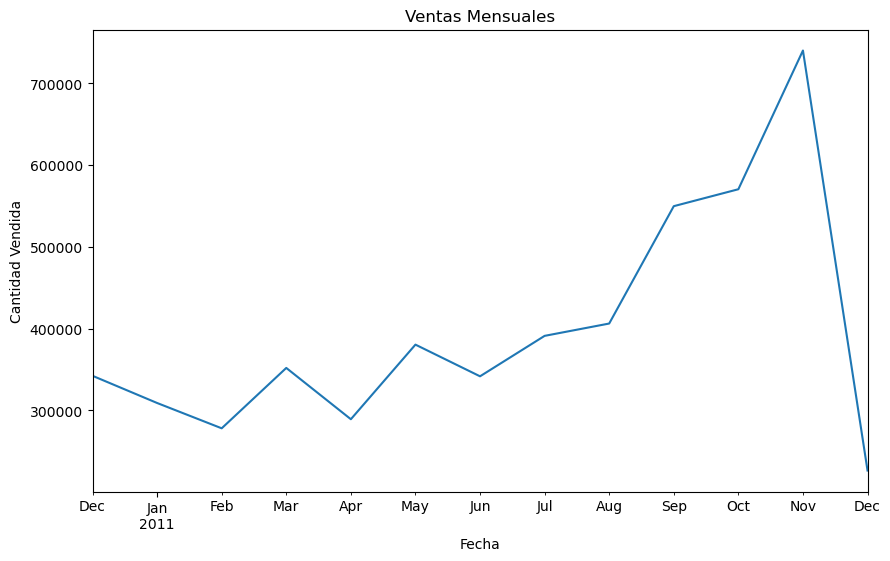

In [37]:
dataset2=dataset.copy()
dataset2['InvoiceDate'] = pd.to_datetime(dataset2['InvoiceDate'])
dataset2.set_index('InvoiceDate', inplace=True)
ventas_mensuales = dataset2.resample('M')['Quantity'].sum()

plt.figure(figsize=(10, 6))
ventas_mensuales.plot()
plt.title('Ventas Mensuales')
plt.xlabel('Fecha')
plt.ylabel('Cantidad Vendida')
plt.show()

In [38]:
solo_texto = dataset[dataset['StockCode'].str.isalpha()]

In [39]:
stockcode_unicos = solo_texto[['StockCode', 'Description']]
stockcode_unicos['StockCode'].unique()

array(['POST', 'D', 'DOT', 'M', 'S', 'AMAZONFEE', 'm', 'DCGSSBOY',
       'DCGSSGIRL', 'PADS', 'B', 'CRUK'], dtype=object)

In [40]:
description_unicos = solo_texto[['StockCode', 'Description']]
description_unicos['Description'].unique()

array(['POSTAGE', 'Discount', 'DOTCOM POSTAGE', 'Manual', 'SAMPLES',
       'AMAZON FEE', nan, 'BOYS PARTY BAG', 'GIRLS PARTY BAG',
       'PADS TO MATCH ALL CUSHIONS', 'Adjust bad debt', 'CRUK Commission'],
      dtype=object)

In [56]:
columnas_especiales = dataset['InvoiceNo'][dataset['InvoiceNo'].apply(lambda x: any(c.isalpha() for c in str(x)))]
cantidad=columnas_especiales

print('cantidad de registro con transacciones especiales: ', len(cantidad))
print('cantidad de valores unicos: ', columnas_especiales.unique().shape[0])

cantidad de registro con transacciones especiales:  9291
cantidad de valores unicos:  3839


In [ ]:
dataset[dataset['Quantity'] < 0].shape
